In [91]:
import seaborn as sns
df = sns.load_dataset('iris')


Int64Index([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
            17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
            34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49],
           dtype='int64')


,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
5,5.4,3.9,1.7,0.4,setosa
6,4.6,3.4,1.4,0.3,setosa
7,5.0,3.4,1.5,0.2,setosa
8,4.4,2.9,1.4,0.2,setosa
9,4.9,3.1,1.5,0.1,setosa


In [66]:

values=df.iloc[:,:-1].mean().values.tolist()
values += values[:1]
values

[5.843333333333335,
 3.057333333333334,
 3.7580000000000027,
 1.199333333333334,
 5.843333333333335]

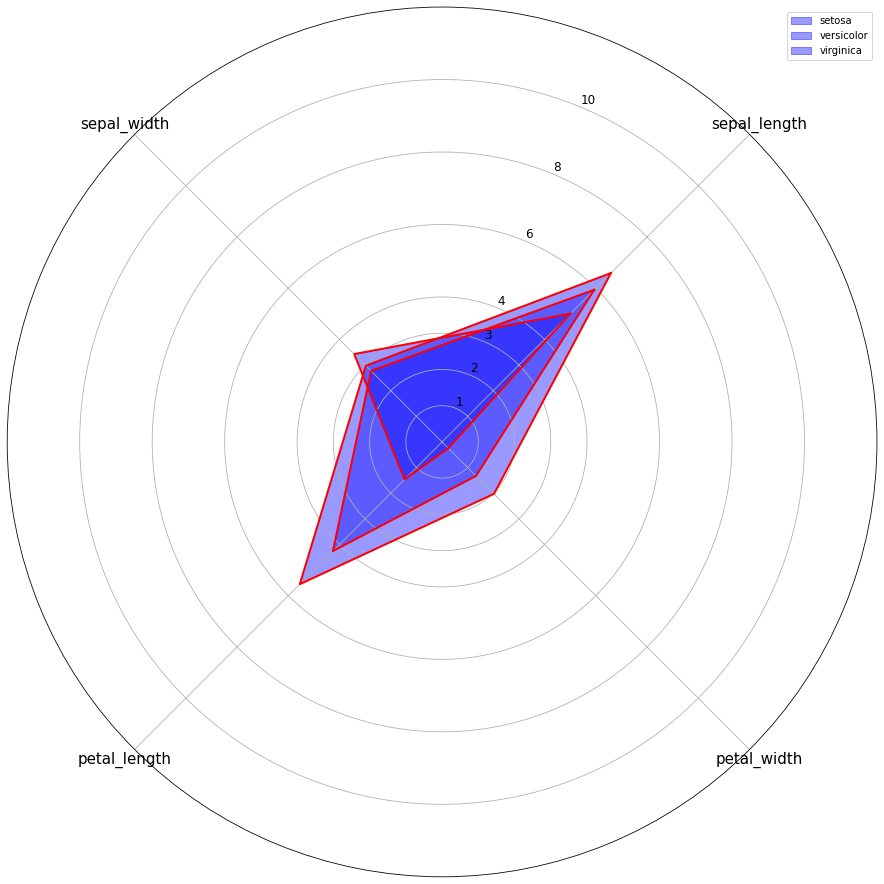

In [127]:
import matplotlib.pyplot as plt
import pandas as pd
from math import pi
 
# This function takes pandas dataFrame 
# values means df without grouping value
# you can control xlabels of plot with controlling column names of df entered
# color means the line color- you can use any color coding that matplotlib supports
# alpha means fill alpha value -scalar-
# fillcolor is the color you want- you can use any color coding that matplotlib supports
# y_ticks must be dict that should inserted as {'value':[1,2,3,4,5],'labels':'['1','2','3','4','5']','color':'black','size':12}

def spider_plot(df,color,alpha,fillcolor,y_ticks,ax=None,title='Title') :
  # Categories that I want to show. I take the count of categories to divide the ax properly.
    
  if ax==None:
    my_dpi=96
    plt.figure(figsize=(500/my_dpi, 500/my_dpi), dpi=my_dpi)
    ax = plt.subplot(111, polar=True, )
    plt.title(title, size=11, color=color)

  categories=list(df)
  N = len(categories)

  # Pointed polar coordinates angles. 
  angles = [n / float(N) * 2 * pi for n in range(N)]
  # For coming back to starting point we must add first point to the end of array ex: [1 2 3]+[1]=[1 2 3 1] it has to be circular 
  angles += angles[:1]

  # defining the subplots and choosing the row to show plot -we need it for for loop- polar coordinates opened.
  
  
  ax.set_theta_offset(pi / 4)
  #ax.set_theta_direction(-1)
  
  plt.xticks(angles[:-1], categories, color='black',rotation=55, size=15)
  
  #ax.set_rlabel_position(0) #this will take y axis to 0.
  plt.yticks(y_ticks['value'], y_ticks['labels'], color=y_ticks['color'], size=y_ticks['size'])
  plt.ylim(y_ticks['ylim'][0],y_ticks['ylim'][1])

  values=df.mean().values.tolist()
  values += values[:1]
  values
  ax.plot(angles, values, color=color, linewidth=2, linestyle='solid')
  ax.fill(angles, values, color=fillcolor, alpha=alpha,label=title)
  plt.legend()


df2=df.iloc[:,:-1]   
color='red'
fillcolor='blue'
alpha=0.4
y_ticks={'value':[1,2,3,4,6,8,10],'labels':['1','2','3','4','6','8','10'],'color':'black','size':12,'ylim':[0,12]}
classes=pd.unique(df.species)
indices=df.groupby('species').groups
plt.figure(figsize=(16,16))
ax = plt.subplot(111, polar=True, )

for clas in classes:
  
  spider_plot(df2.iloc[indices[clas],:],color,alpha,fillcolor,y_ticks,ax,clas)
 

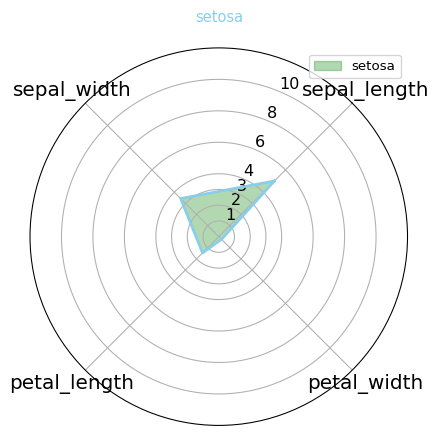

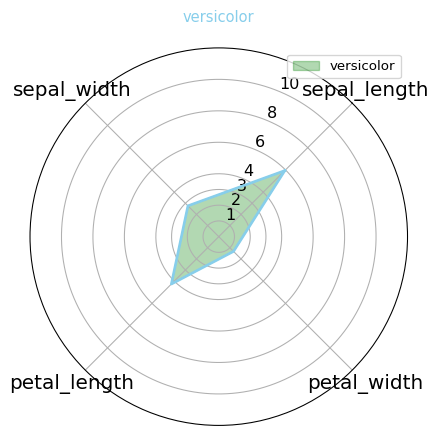

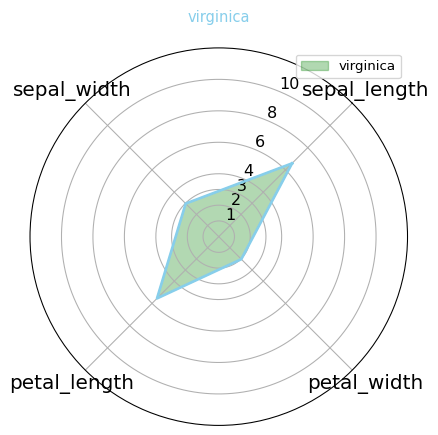

In [121]:
for clas in classes:
  
  spider_plot(df2.iloc[indices[clas],:],'skyblue',0.3,'green',y_ticks,None,clas)

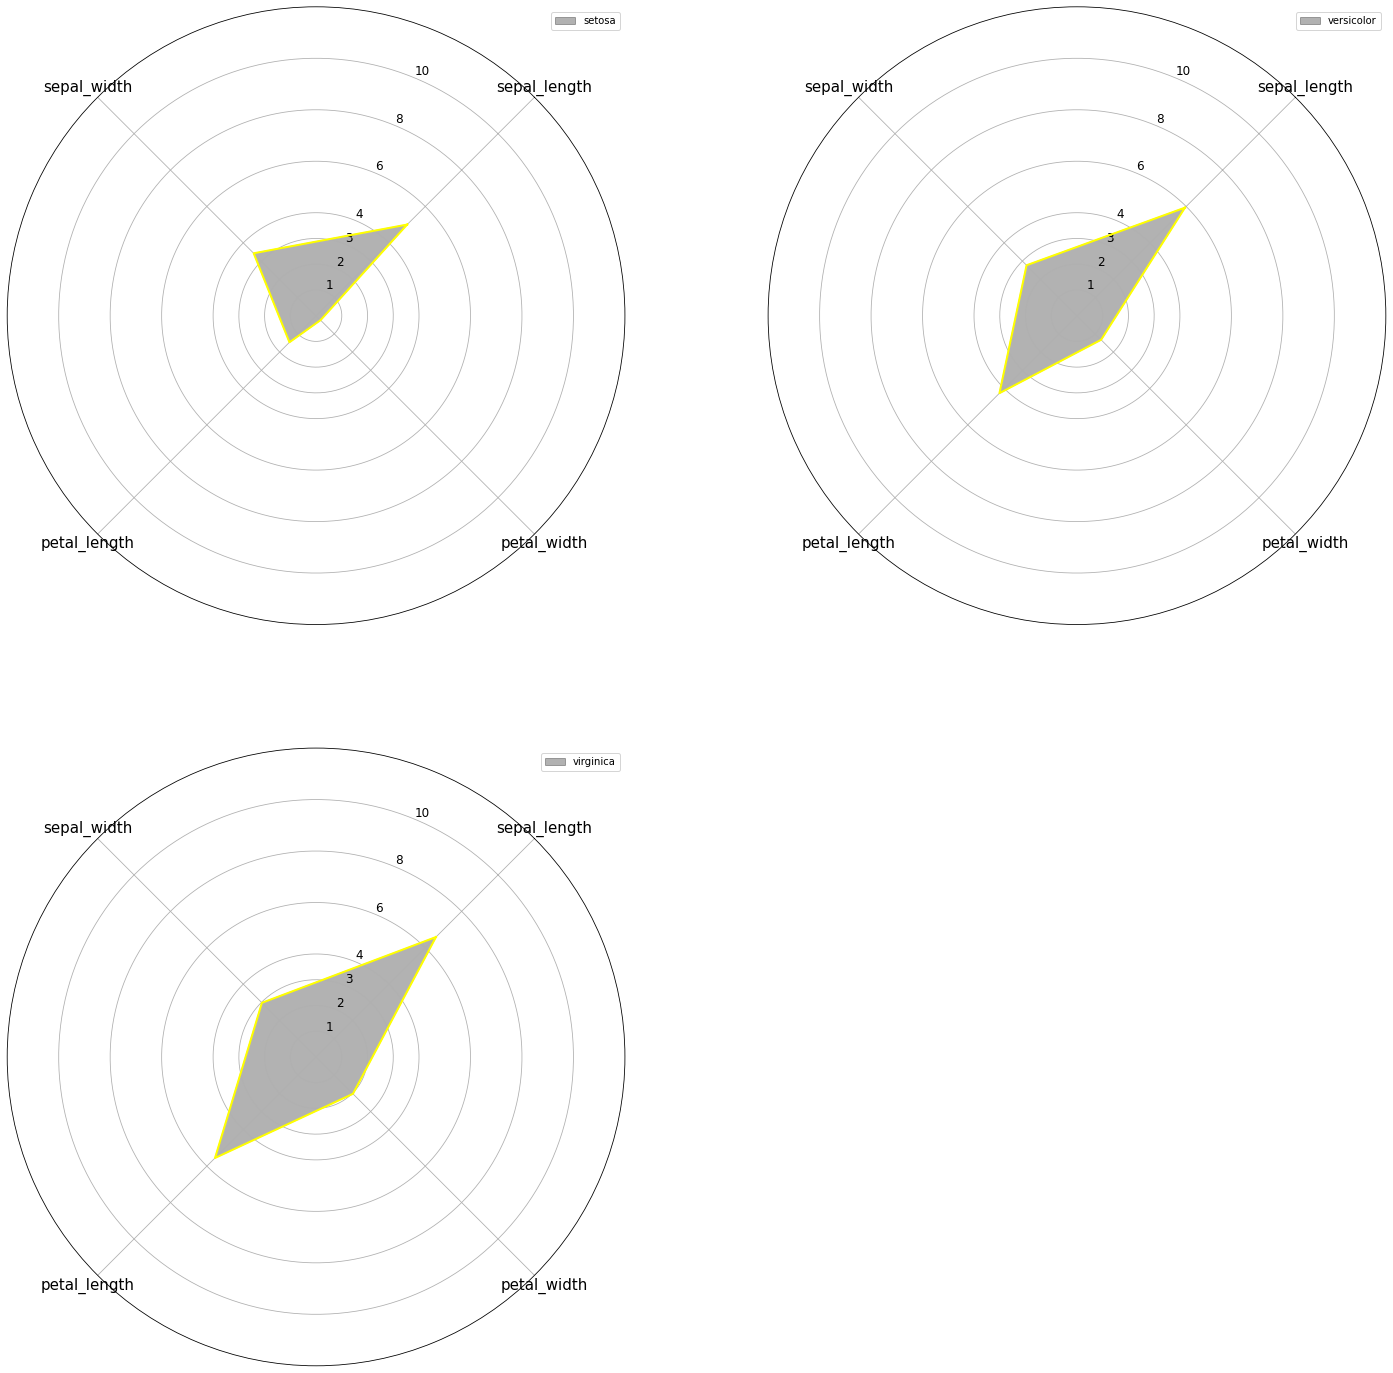

In [129]:
plt.figure(figsize=(25,25))


for idx,clas in enumerate(classes):
  
  ax = plt.subplot(2,2,idx+1, polar=True, )
  
  spider_plot(df2.iloc[indices[clas],:],'yellow',0.3,'black',y_ticks,ax,clas)